In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dmkd/24. Mushrooms.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 8124 rows and 23 columns.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
           "gill-attachment", "gill-spacing", "gill-size", "gill-color",
           "stalk-shape", "stalk-root", "stalk-surface-above-ring",
           "stalk-surface-below-ring", "stalk-color-above-ring",
           "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
           "ring-type", "spore-print-color", "population", "habitat"]



# Drop non-numeric columns for simplicity in this example
numeric_df = df.drop(["class", "bruises", "gill-attachment", "gill-spacing", "gill-size", "stalk-shape", "veil-type", "ring-number"], axis=1)

# Fill missing values and encode categorical features
numeric_df.fillna("missing", inplace=True)
numeric_df_encoded = pd.get_dummies(numeric_df)

# Display the first few rows of the preprocessed DataFrame
print(numeric_df_encoded.head())


   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1             0  

In [5]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


# **Application of Clustering**

# **Selecting Data for clustering analysis**

In [6]:
X = df.iloc[:, [3, 5]].values

# **Issues in clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

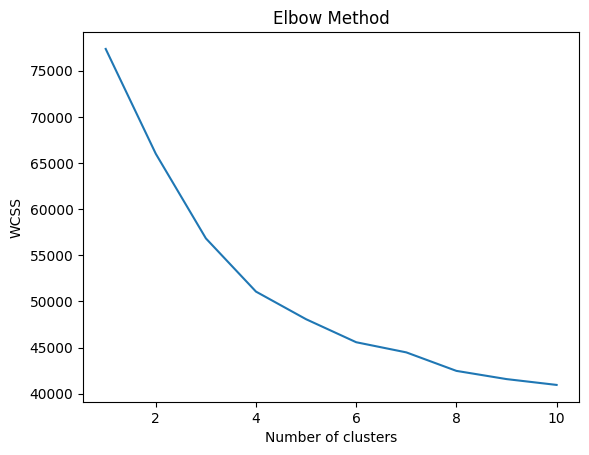

In [7]:
from sklearn.cluster import KMeans
# (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numeric_df_encoded)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Hierarchical Clustering Methods**

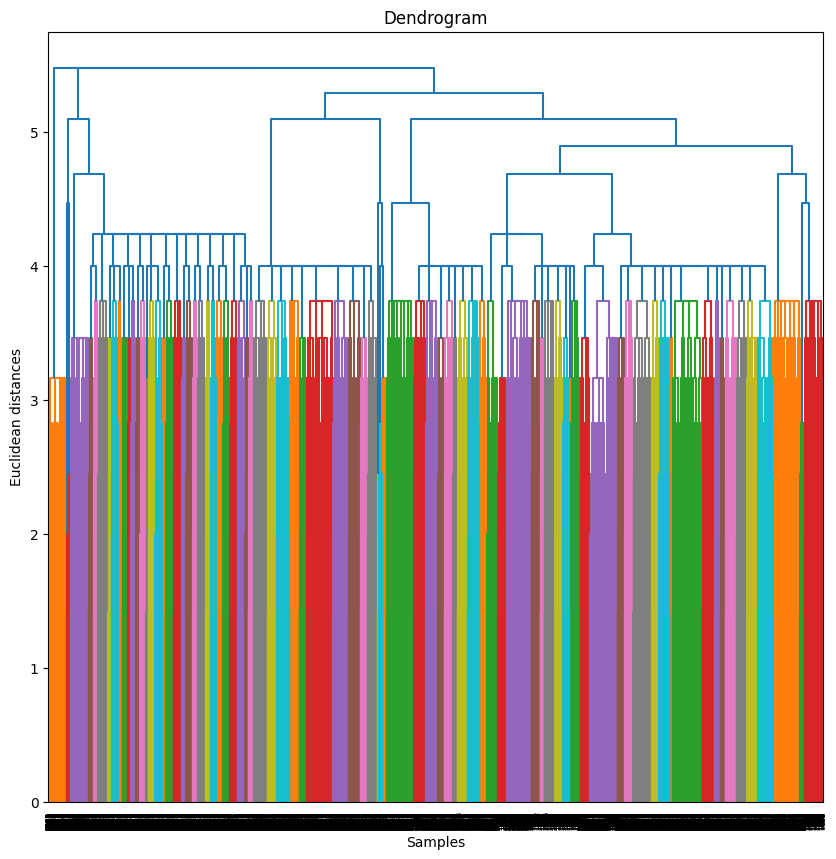

In [8]:
plt.figure(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(numeric_df_encoded, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


# **Aggolomerative Clustering**

## **Single linkage**

Single linkage, sometimes termed the nearest-neighbor approach, is based on
the minimum distance between any record in cluster A and any record in cluster
B. In other words, cluster similarity is based on the similarity of the most
similar members from each cluster.
Single linkage tends to form long, slender clusters, which may sometimes lead
to heterogeneous records being clustered together.

In [9]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='single')
y_hc = hc.fit_predict(numeric_df_encoded)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


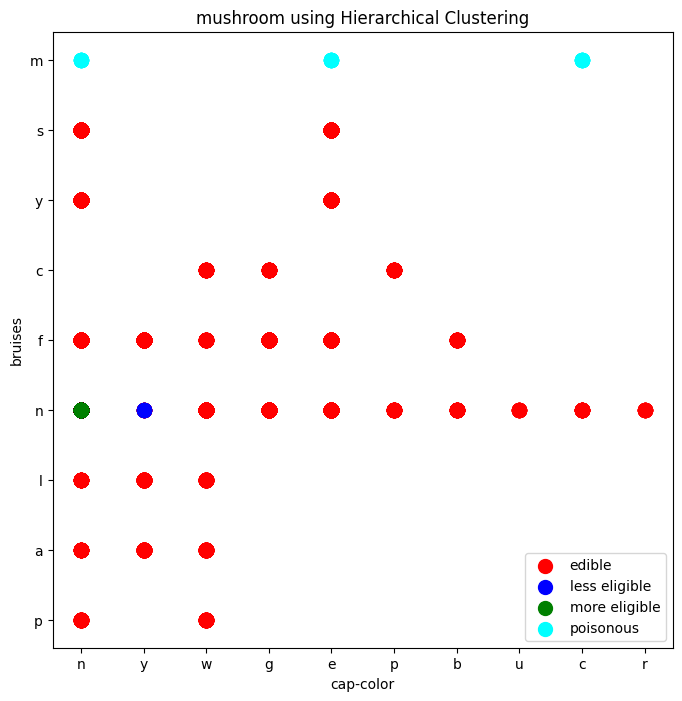

In [10]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'edible')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'less eligible')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'more eligible')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'poisonous')
plt.title('mushroom using Hierarchical Clustering')
plt.xlabel('cap-color')
plt.ylabel('bruises')
plt.legend()
plt.show()

## **Complete linkage**

Complete linkage, sometimes termed the farthest-neighbor approach, is based
on the maximum distance between any record in cluster A and any record in
cluster B.In other words, cluster similarity is based on the similarity of the
most dissimilar members from each cluster.
Complete-linkage tends to form more compact, sphere-like clusters, with all
records in a cluster within a given diameter of all other records.

In [11]:
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(numeric_df_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


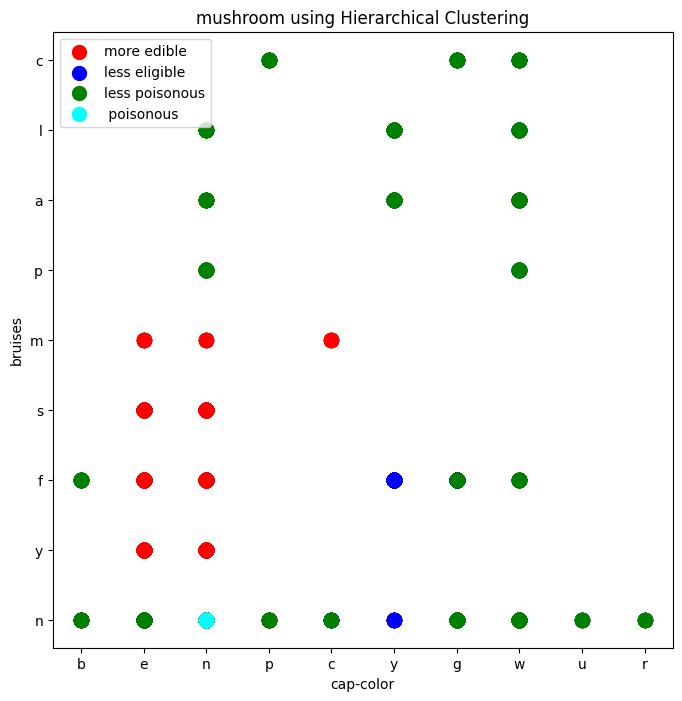

In [12]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'more edible')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'less eligible')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'less poisonous')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = ' poisonous')
plt.title('mushroom using Hierarchical Clustering')
plt.xlabel('cap-color')
plt.ylabel('bruises')
plt.legend()
plt.show()

## **Average linkage**

Average linkage is designed to reduce the dependence of the cluster-linkage criterion on extreme values, such as the most similar or dissimilar records. In
average linkage, the criterion is the average distance of all the records in
cluster A from all the records in cluster B.
The resulting clusters tend to have approximately equal within-cluster variability.

In [13]:
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
y_hc = hc.fit_predict(numeric_df_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


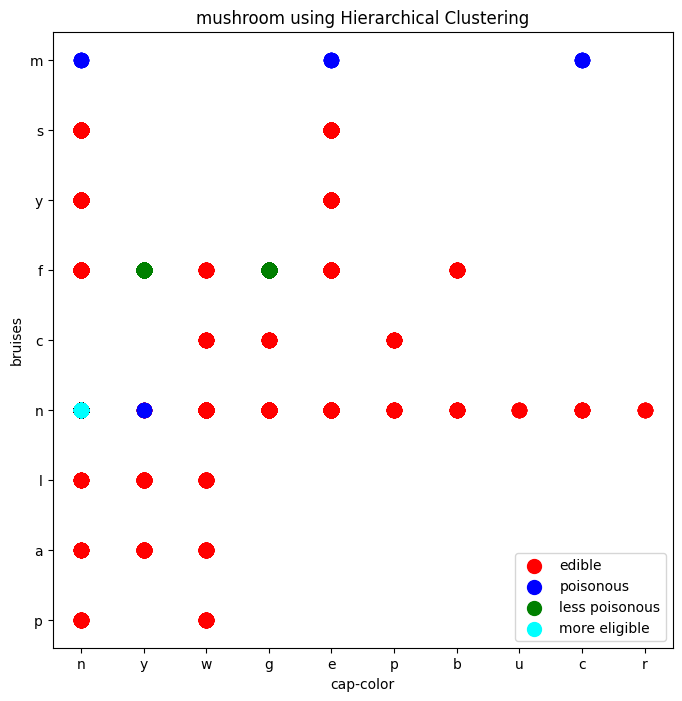

In [14]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'edible')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'poisonous')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'less poisonous')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'more eligible')

plt.title('mushroom using Hierarchical Clustering')
plt.xlabel('cap-color')
plt.ylabel('bruises')
plt.legend()
plt.show()

## **Ward linkage**

Ward´s linkage is a method for hierarchical cluster analysis . The idea has much in common with analysis of variance (ANOVA). The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster. Ward´s Method seeks to choose the successive clustering steps so as to minimize the increase in ESS at each step.



In [15]:
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(numeric_df_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


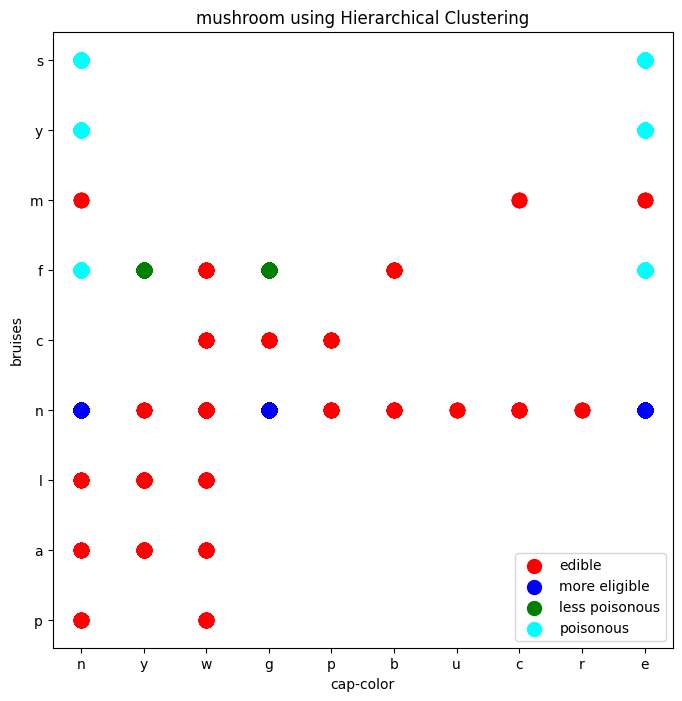

In [16]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'edible')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'more eligible')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'less poisonous')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'poisonous')
plt.title('mushroom using Hierarchical Clustering')
plt.xlabel('cap-color')
plt.ylabel('bruises')
plt.legend()
plt.show()

# **k-means Clustering**

In [17]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(numeric_df_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


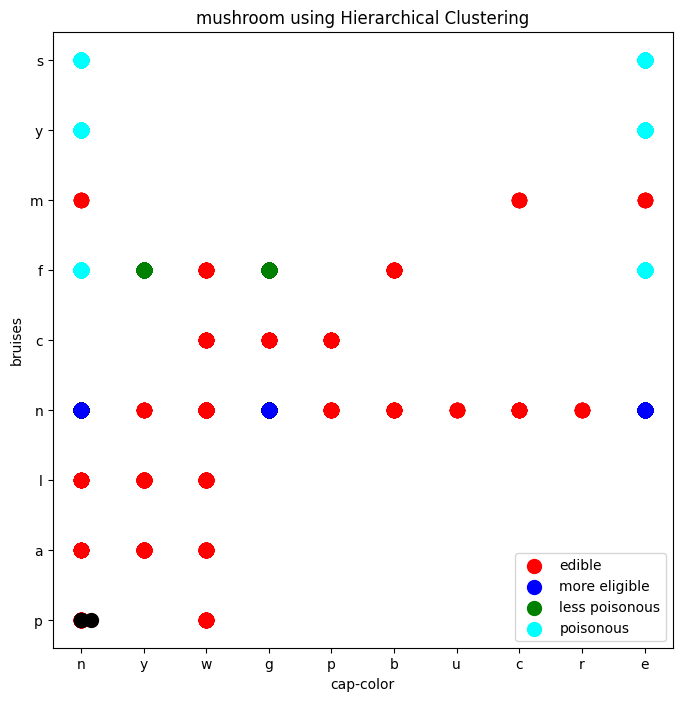

In [18]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'edible')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'more eligible')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'less poisonous')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'poisonous')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.title('mushroom using Hierarchical Clustering')
plt.xlabel('cap-color')
plt.ylabel('bruises')
plt.legend()
plt.show()